### Aim: 
    a.	Classify the test images as low contrast, high contrast, dark and bright images by plotting their histograms.

    b.	Implement histogram equalization on any one of the low contrast, dark and bright images

### Imports and reading images

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

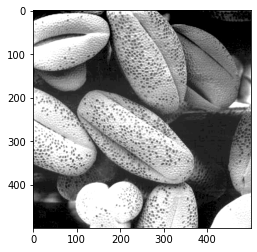

In [3]:
img1 = cv2.imread("image1.tif",0)
plt.imshow(img1, cmap="gray")

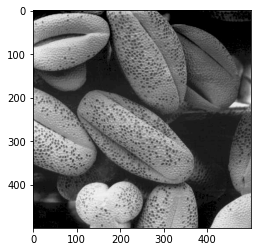

In [4]:
img2 = cv2.imread("image2.tif",0)
plt.imshow(img2, cmap="gray")

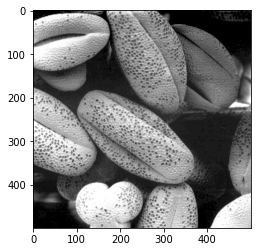

In [5]:
img3 = cv2.imread("image3.tif",0)
plt.imshow(img3, cmap="gray")

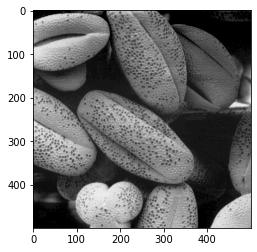

In [6]:
img4 = cv2.imread("image4.png",0)
plt.imshow(img4, cmap="gray")

### a. Drawing Histograms and classifying Images

####Histogram Using Matplotlib

(array([[ 78.,  81.,  24., ...,  20.,  34., 176.],
        [ 81.,  78.,  19., ...,  22.,  50., 167.],
        [ 83.,  73.,  24., ...,  28.,  51., 165.],
        ...,
        [ 96.,  36.,   9., ...,  63.,  52.,  94.],
        [ 94.,  30.,  13., ...,  55.,  48., 102.],
        [ 91.,  32.,  12., ...,  61.,  40., 107.]]),
 array([132. , 144.3, 156.6, 168.9, 181.2, 193.5, 205.8, 218.1, 230.4,
        242.7, 255. ]),
 <a list of 500 Lists of Patches objects>)

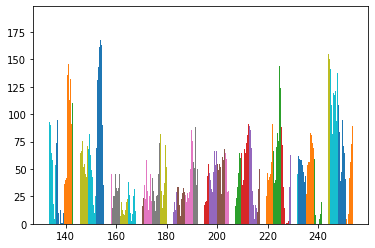

In [7]:
plt.hist(img1)

(array([[80., 93., 49., ..., 55., 50., 18.],
        [81., 88., 49., ..., 62., 51., 20.],
        [84., 86., 54., ..., 56., 56., 18.],
        ...,
        [97., 37., 72., ..., 36., 26.,  0.],
        [96., 31., 76., ..., 39., 24.,  0.],
        [92., 36., 68., ..., 45., 27.,  0.]]),
 array([ 91. ,  95.7, 100.4, 105.1, 109.8, 114.5, 119.2, 123.9, 128.6,
        133.3, 138. ]),
 <a list of 500 Lists of Patches objects>)

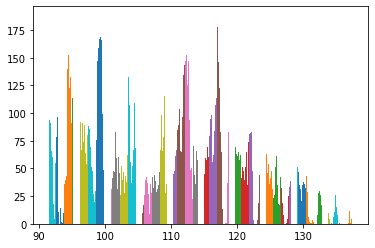

In [8]:
plt.hist(img2)

(array([[ 89.,  82.,  31., ...,  58.,  54.,  92.],
        [ 91.,  78.,  35., ...,  53.,  54., 100.],
        [ 92.,  75.,  36., ...,  52.,  50.,  98.],
        ...,
        [104.,  30.,  36., ...,  48.,  36.,  41.],
        [104.,  23.,  41., ...,  59.,  31.,  43.],
        [ 99.,  29.,  31., ...,  36.,  48.,  43.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 500 Lists of Patches objects>)

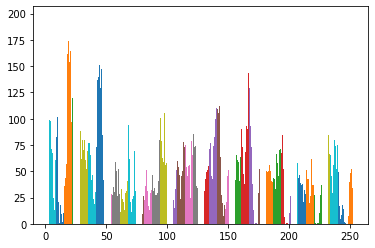

In [9]:
plt.hist(img3)

(array([[106.,  77.,  39., ...,  57.,  52.,  14.],
        [105.,  73.,  40., ...,  63.,  53.,  17.],
        [109.,  71.,  44., ...,  58.,  55.,  17.],
        ...,
        [112.,  29.,  65., ...,  41.,  21.,   0.],
        [105.,  32.,  66., ...,  41.,  22.,   0.],
        [105.,  30.,  61., ...,  46.,  26.,   0.]]),
 array([13., 20., 27., 34., 41., 48., 55., 62., 69., 76., 83.]),
 <a list of 500 Lists of Patches objects>)

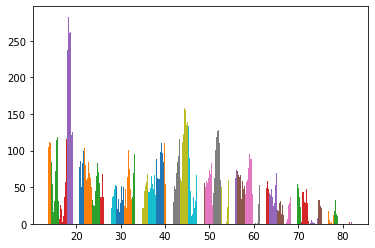

In [10]:
plt.hist(img4)

#### Plotting Histogram using own function

In [11]:
def histogram(img):
    (val1,freq1) = np.unique(img, return_counts=True) # first getting the intensity values and freq

    # Creating an array size = 256 to show all intensity values
    val = np.zeros(256)
    for i in val1:
        val[i] = int(i)
    
    # Similarly for frequency 
    freq = np.zeros(256)
    for index, i in enumerate(val1):
        freq[i] = int(freq1[index])

    return val,freq

#####Image 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


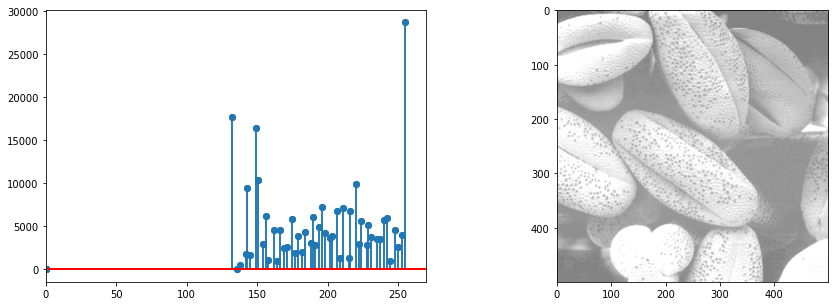

In [12]:
(val, freq) = histogram(img1)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.stem(val,freq)
plt.xlim((0,270))
markerline, stemlines, baseline = plt.stem(val,freq)
plt.setp(baseline, 'color', 'r', 'linewidth', 2)
baseline.set_xdata([0,270])
baseline.set_transform(plt.gca().get_yaxis_transform())

plt.subplot(1,2,2)
plt.imshow(img1, cmap="gray",vmin=0, vmax=255)
# plt regularizes the images - and we cannot see the original image if we dont use vmin and vmax

Since the histogram leans towards the brighter pixels - we can say that Image 1 is the **Bright** Image

#####Image 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


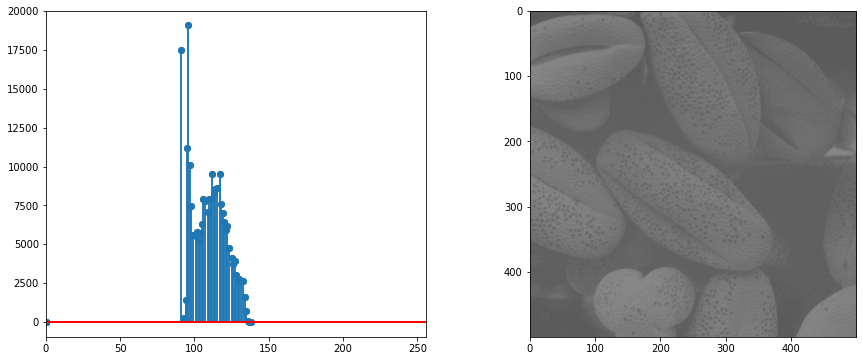

In [13]:
(val, freq) = histogram(img2)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.stem(val,freq)
plt.xlim((0,256))
markerline, stemlines, baseline = plt.stem(val,freq)
plt.setp(baseline, 'color', 'r', 'linewidth', 2)
baseline.set_xdata([0,256])
baseline.set_transform(plt.gca().get_yaxis_transform())

plt.subplot(1,2,2)
plt.imshow(img2, cmap="gray",vmin=0, vmax=255)


Since the Histogram of this image has a very small range of pixel values - we can say that this is a **Low Contrast Image** 

#####Image 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


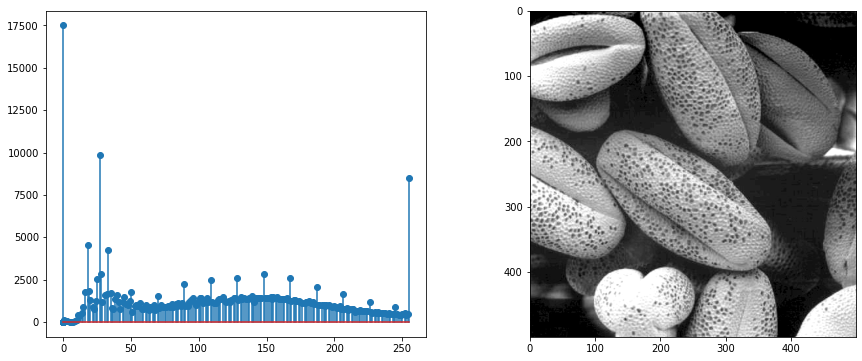

In [14]:
(val, freq) = histogram(img3)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.stem(val,freq)


plt.subplot(1,2,2)
plt.imshow(img3, cmap="gray",vmin=0, vmax=255)


Since this image has a wide range of pixel values - we can say that this image is a **High contrast Image**

#####Image 4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


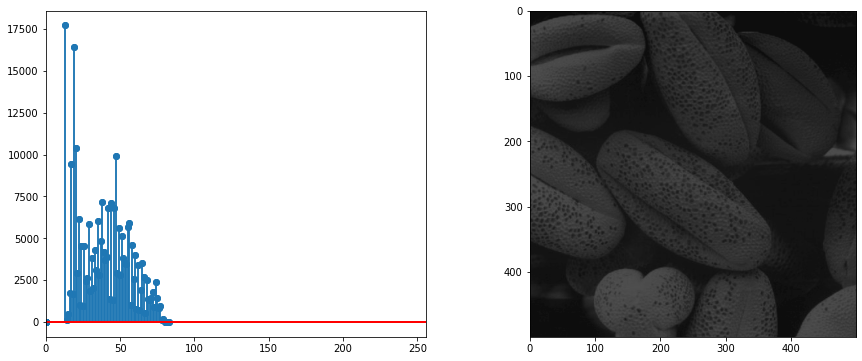

In [15]:
(val, freq) = histogram(img4)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.stem(val,freq)
plt.xlim((0,256))
markerline, stemlines, baseline = plt.stem(val,freq)
plt.setp(baseline, 'color', 'r', 'linewidth', 2)
baseline.set_xdata([0,256])
baseline.set_transform(plt.gca().get_yaxis_transform())

plt.subplot(1,2,2)
plt.imshow(img4, cmap="gray",vmin=0, vmax=255)


Since the Pixel values of this image lean towards the low values of pixels - we can say that this is a **darker image**

#### All 4 Images Plotted

Text(0.5, 1.0, 'Darker Image')

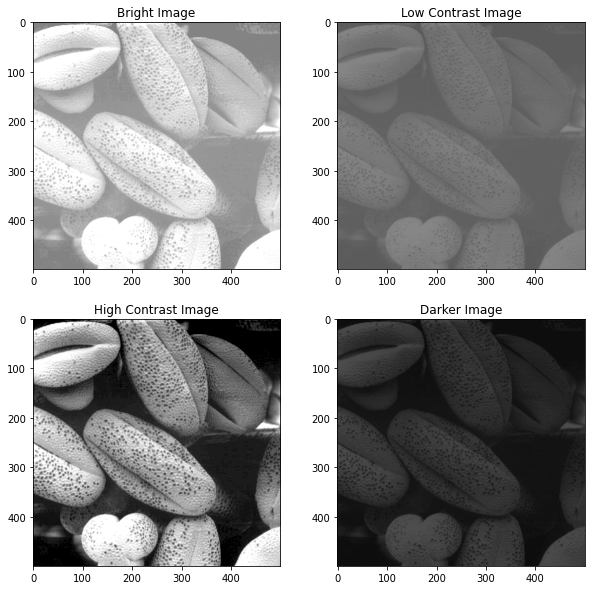

In [16]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(img1, cmap="gray",vmin=0, vmax=255)
plt.title("Bright Image")

plt.subplot(2,2,2)
plt.imshow(img2, cmap="gray",vmin=0, vmax=255)
plt.title("Low Contrast Image")

plt.subplot(2,2,3)
plt.imshow(img3, cmap="gray",vmin=0, vmax=255)
plt.title("High Contrast Image")

plt.subplot(2,2,4)
plt.imshow(img4, cmap="gray",vmin=0, vmax=255)
plt.title("Darker Image")

### Histogram Equalization

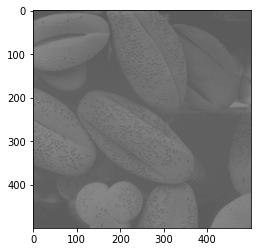

In [17]:
img1 = cv2.imread("image2.tif",0)
plt.imshow(img1, cmap="gray", vmax=255, vmin=0)

In [86]:
(m,n) = img1.shape

In [31]:
(val1, count) = np.unique(img1, return_counts=True)

In [37]:
# Indices
val = np.arange(0,256,dtype='int')

# Inserting frequency at correct index
freq = np.zeros(256)
for index, i in enumerate(val1):
    freq[i] = int(count[index])

In [47]:
df = pd.DataFrame()

In [48]:
df["rk"] = val

In [49]:
df["nk"] = freq

In [50]:
df.loc[91]

rk       91.0
nk    17496.0
Name: 91, dtype: float64

In [51]:
n = sum(df["nk"])
n

250000.0

In [52]:
df["prk"] = df["nk"]/n

In [72]:
sum = 0
for i in range(256):
    sum += df.iat[i,2]
    df.at[i,'CDF'] = sum

In [78]:
df.loc[96]

rk        96.000000
nk     19078.000000
prk        0.076312
CDF        0.197880
Name: 96, dtype: float64

In [79]:
df["Sk"] = 255*df["CDF"]

In [80]:
df["SkRound"] = round(df["Sk"])

In [81]:
df.loc[98]

rk           98.000000
nk         7494.000000
prk           0.029976
CDF           0.268340
Sk           68.426700
SkRound      68.000000
Name: 98, dtype: float64

In [85]:
df.loc[df["nk"]>0]

,rk,nk,prk,CDF,Sk,SkRound
91,91,17496.0,0.069984,0.069984,17.84592,18.0
93,93,269.0,0.001076,0.071060,18.12030,18.0
94,94,1427.0,0.005708,0.076768,19.57584,20.0
95,95,11200.0,0.044800,0.121568,30.99984,31.0
96,96,19078.0,0.076312,0.197880,50.45940,50.0
97,97,10121.0,0.040484,0.238364,60.78282,61.0
98,98,7494.0,0.029976,0.268340,68.42670,68.0
99,99,5604.0,0.022416,0.290756,74.14278,74.0
101,101,5523.0,0.022092,0.312848,79.77624,80.0
102,102,5816.0,0.023264,0.336112,85.70856,86.0


In [87]:
imgEqu = np.zeros((m,n),dtype=int) # Create a matrix for equalized image
# Replace the pixel value in the original image by the pixel value sk obtained after equalization
for i in range(m):
  for j in range(n):
    temp= img1[i,j]
    imgEqu[i,j]= df["SkRound"][temp]

imgEqu = imgEqu.astype('int')

Text(0.5, 1.0, 'Equalized Image')

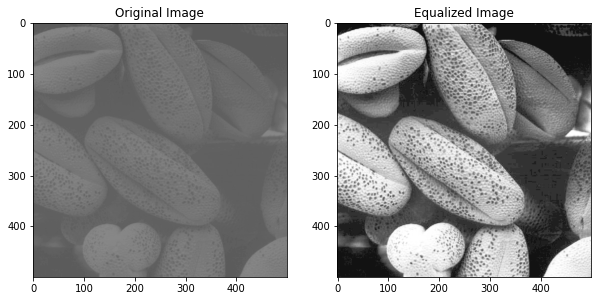

In [89]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img1, cmap="gray", vmax=255, vmin=0)
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(imgEqu, cmap="gray", vmax=255, vmin=0)
plt.title("Equalized Image")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To rem

Text(0, 0.5, 'Intensity in the new image')

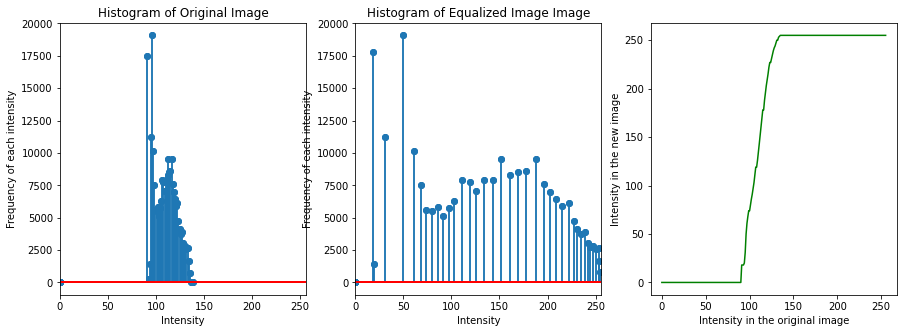

In [93]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
(val, freq) = histogram(img1)
plt.stem(val,freq)
plt.xlim((0,256))
markerline, stemlines, baseline = plt.stem(val,freq)
plt.setp(baseline, 'color', 'r', 'linewidth', 2)
baseline.set_xdata([0,256])
baseline.set_transform(plt.gca().get_yaxis_transform())
plt.title("Histogram of Original Image")
plt.xlabel("Intensity")
plt.ylabel("Frequency of each intensity")

plt.subplot(1,3,2)
(val, freq) = histogram(imgEqu)
plt.stem(val,freq)
plt.xlim((0,256))
markerline, stemlines, baseline = plt.stem(val,freq)
plt.setp(baseline, 'color', 'r', 'linewidth', 2)
baseline.set_xdata([0,256])
baseline.set_transform(plt.gca().get_yaxis_transform())
plt.title("Histogram of Equalized Image Image")
plt.xlabel("Intensity")
plt.ylabel("Frequency of each intensity")

plt.subplot(1,3,3)
plt.plot(df["rk"], df["SkRound"], c="g")
plt.xlabel("Intensity in the original image")
plt.ylabel("Intensity in the new image")

### Conclusion

In Conclusion, we can say that we have learned to plot histogram with our own function.
We observed that after an image was equalized the the constrast of the image increased.
The intensity of image was spread over a larger range.
The most frequent values were given a larger-spread out range